In [1]:
# Importing needed libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV file
file_path = 'D:/kaggle-cmi-detect-behavior-with-sensor-data/cmi-detect-behavior-with-sensor-data/train.csv'

# Reading the CSV file
df_original_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe, we will be doing this as checking step every step along the way
df_original_data.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [2]:
# Checking number of null values in each column
df_original_data.isnull().sum()

row_id                  0
sequence_type           0
sequence_id             0
sequence_counter        0
subject                 0
                    ...  
tof_5_v59           30142
tof_5_v60           30142
tof_5_v61           30142
tof_5_v62           30142
tof_5_v63           30142
Length: 341, dtype: int64

In [5]:
# Defining feature and target
X = df_original_data.iloc[:, 9:].values
y = df_original_data.iloc[:, 1].values

print(X)
print(y)

[[ 6.68359375  6.21484375  3.35546875 ... -1.         -1.
  -1.        ]
 [ 6.94921875  6.21484375  3.125      ... -1.         -1.
  -1.        ]
 [ 5.72265625  5.41015625  5.421875   ... -1.         -1.
  -1.        ]
 ...
 [ 3.08203125  0.21875    -7.40234375 ... -1.         -1.
  -1.        ]
 [ 3.96484375 -0.359375   -9.0859375  ... -1.         -1.
  -1.        ]
 [ 4.26953125 -0.93359375 -9.62890625 ... -1.         -1.
  -1.        ]]
['Target' 'Target' 'Target' ... 'Non-Target' 'Non-Target' 'Non-Target']


In [7]:
# Now the feature column has some null values - imputing them with a constant value Zero
import numpy as np

# Replace NaNs with 0
X = df_original_data.iloc[:, 9:].values
X = np.nan_to_num(X, nan=0)
print(X[:5])  # Display first 5 rows

[[ 6.68359375  6.21484375  3.35546875 ... -1.         -1.
  -1.        ]
 [ 6.94921875  6.21484375  3.125      ... -1.         -1.
  -1.        ]
 [ 5.72265625  5.41015625  5.421875   ... -1.         -1.
  -1.        ]
 [ 6.6015625   3.53125     6.45703125 ... -1.         -1.
  -1.        ]
 [ 5.56640625  0.27734375  9.6328125  ... -1.         -1.
  -1.        ]]


In [9]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [13]:
# Fitting KNN to the training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [15]:
# Predicting the test set - results
y_pred = classifier.predict(X_test_s)
print(y_pred)

['Non-Target' 'Non-Target' 'Target' ... 'Target' 'Target' 'Non-Target']


In [16]:
# Actual values for reference
print(y_test)

['Non-Target' 'Non-Target' 'Target' ... 'Target' 'Non-Target' 'Non-Target']


In [17]:
# Confusion Matrix

from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.93


Confusion Matrix:
[[61171  8204]
 [ 4585 98524]] 


-----------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

  Non-Target       0.93      0.88      0.91     69375
      Target       0.92      0.96      0.94    103109

    accuracy                           0.93    172484
   macro avg       0.93      0.92      0.92    172484
weighted avg       0.93      0.93      0.93    172484



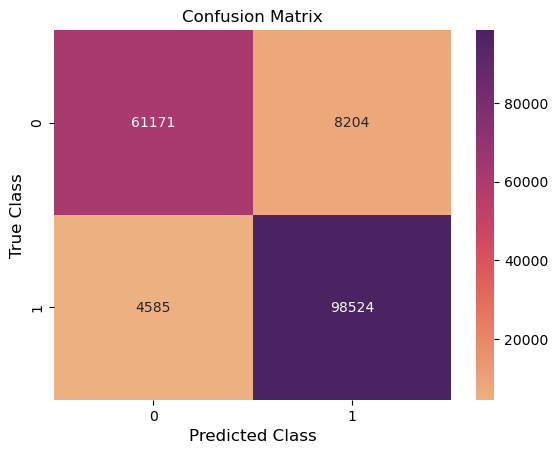

In [18]:
# Plotting the confusion matrix

ax=sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [24]:
# Accuracy looks good, using same configuration/model to train using whole data

In [25]:
# Defining feature and target
A = df_original_data.iloc[:, 9:].values
b = df_original_data.iloc[:, 1].values

print(A)
print(b)

[[ 6.68359375  6.21484375  3.35546875 ... -1.         -1.
  -1.        ]
 [ 6.94921875  6.21484375  3.125      ... -1.         -1.
  -1.        ]
 [ 5.72265625  5.41015625  5.421875   ... -1.         -1.
  -1.        ]
 ...
 [ 3.08203125  0.21875    -7.40234375 ... -1.         -1.
  -1.        ]
 [ 3.96484375 -0.359375   -9.0859375  ... -1.         -1.
  -1.        ]
 [ 4.26953125 -0.93359375 -9.62890625 ... -1.         -1.
  -1.        ]]
['Target' 'Target' 'Target' ... 'Non-Target' 'Non-Target' 'Non-Target']


In [26]:
# Now the feature column has some null values - imputing them with a constant value Zero
import numpy as np

# Replace NaNs with 0
A = df_original_data.iloc[:, 9:].values
A = np.nan_to_num(A, nan=0)
print(A[:5])  # Display first 5 rows

[[ 6.68359375  6.21484375  3.35546875 ... -1.         -1.
  -1.        ]
 [ 6.94921875  6.21484375  3.125      ... -1.         -1.
  -1.        ]
 [ 5.72265625  5.41015625  5.421875   ... -1.         -1.
  -1.        ]
 [ 6.6015625   3.53125     6.45703125 ... -1.         -1.
  -1.        ]
 [ 5.56640625  0.27734375  9.6328125  ... -1.         -1.
  -1.        ]]


In [28]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train_s = sc.fit_transform(A)

In [29]:
# Fitting KNN to the training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(A_train_s, b)

KNeighborsClassifier()

In [40]:
# Importing the testing data 

# Loading the CSV file
file_path = 'D:/kaggle-cmi-detect-behavior-with-sensor-data/cmi-detect-behavior-with-sensor-data/test.csv'

# Reading the CSV file
df_original_test_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe, we will be doing this as checking step every step along the way
df_original_test_data.head()

,row_id,sequence_id,sequence_counter,subject,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000001_000000,SEQ_000001,0,SUBJ_055840,9.039062,5.261719,0.800781,0.367188,-0.397400,-0.629028,...,97.0,87.0,206.0,-1.0,195.0,-1.0,-1.0,-1.0,111.0,-1.0
1,SEQ_000001_000001,SEQ_000001,1,SUBJ_055840,9.421875,3.460938,-1.113281,0.353882,-0.507141,-0.652710,...,175.0,158.0,-1.0,-1.0,-1.0,-1.0,-1.0,211.0,187.0,178.0
2,SEQ_000001_000002,SEQ_000001,2,SUBJ_055840,10.160156,2.082031,-3.871094,0.384094,-0.532104,-0.639648,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,177.0
3,SEQ_000001_000003,SEQ_000001,3,SUBJ_055840,9.773438,1.355469,-4.371094,0.387756,-0.531982,-0.634033,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,183.0
4,SEQ_000001_000004,SEQ_000001,4,SUBJ_055840,9.195312,1.011719,-3.222656,0.382751,-0.534180,-0.638367,...,-1.0,163.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,200.0,173.0


In [44]:
# Only taking needed columns from test data
original_test_data = df_original_test_data.iloc[:, 4:].values
print(original_test_data)

[[  9.0390625    5.26171875   0.80078125 ...  -1.         111.
   -1.        ]
 [  9.421875     3.4609375   -1.11328125 ... 211.         187.
  178.        ]
 [ 10.16015625   2.08203125  -3.87109375 ...  -1.         197.
  177.        ]
 ...
 [ -4.21484375   8.4140625   -3.37109375 ...  -1.          -1.
   -1.        ]
 [ -4.40625      8.95703125  -3.29296875 ...  -1.          -1.
   -1.        ]
 [ -3.94921875   8.45703125  -3.37109375 ...  -1.          -1.
   -1.        ]]


In [46]:
# Predicting the test set - results
y_pred = classifier.predict(original_test_data)
print(y_pred)

['Non-Target' 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target'
 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target'
 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target' 'Target' 'Target'
 'Target' 'Target' 'Target' 'Target' 'Target' 'Target' 'Target' 'Target'
 'Target' 'Target' 'Target' 'Target' 'Target' 'Target' 'Target' 'Target'
 'Target' 'Target' 'Target' 'Target' 'Target' 'Target' 'Target' 'Target'
 'Target' 'Target' 'Target' 'Target' 'Target' 'Target' 'Target'
 'Non-Target' 'Target' 'Non-Target' 'Target' 'Target' 'Non-Target'
 'Target' 'Target' 'Target' 'Non-Target' 'Non-Target' 'Non-Target'
 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target'
 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target'
 'Non-Target' 'Non-Target' 'Non-Target' 'Non-Target' 'Target' 'Non-Target'
 'Non-Target' 'Non-Target' 'Non-Target' 'Target' 'Non-Target' 'Target'
 'Non-Target' 'Non-Target' 'Non-Target' 'Target' 'Non-Target' 'Non-Target'
 'Target' 'Target' 'Non-Tar

In [ ]:
# ~ End of code.